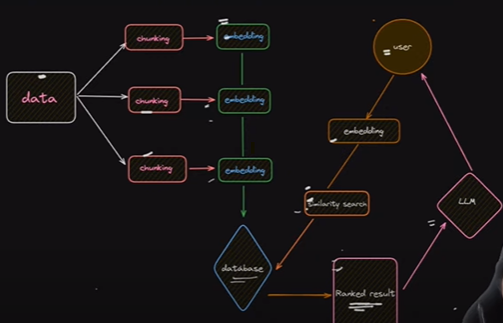

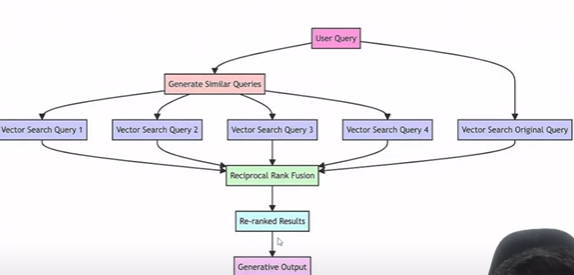

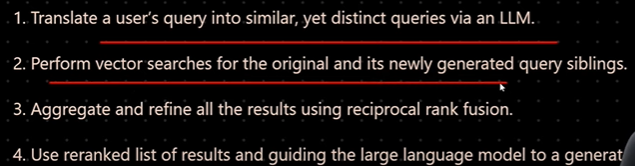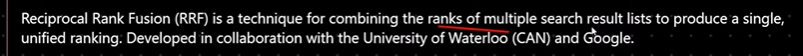

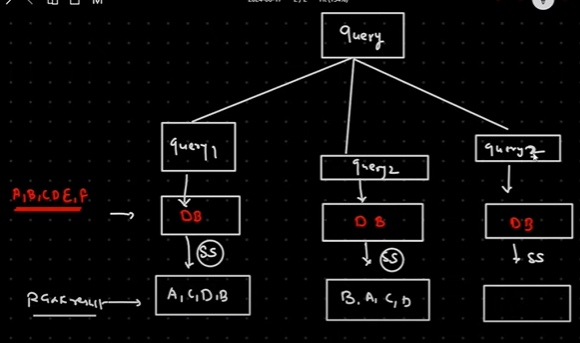

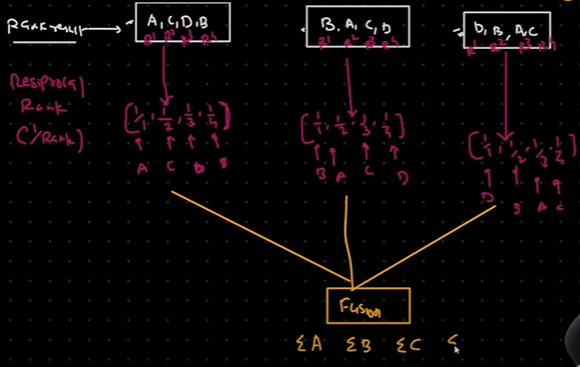

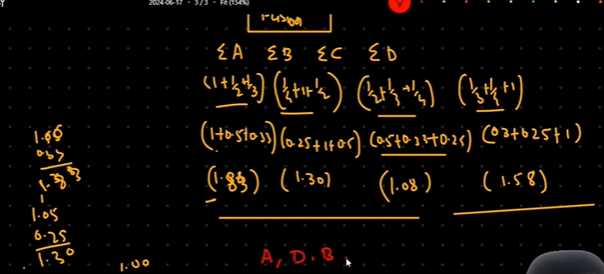

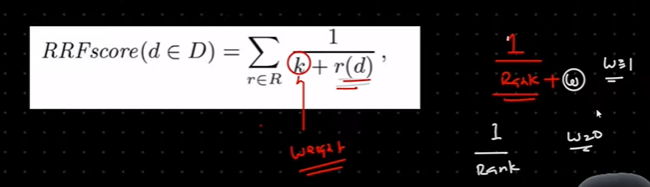

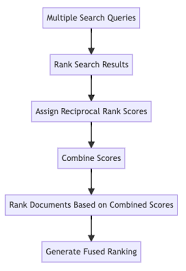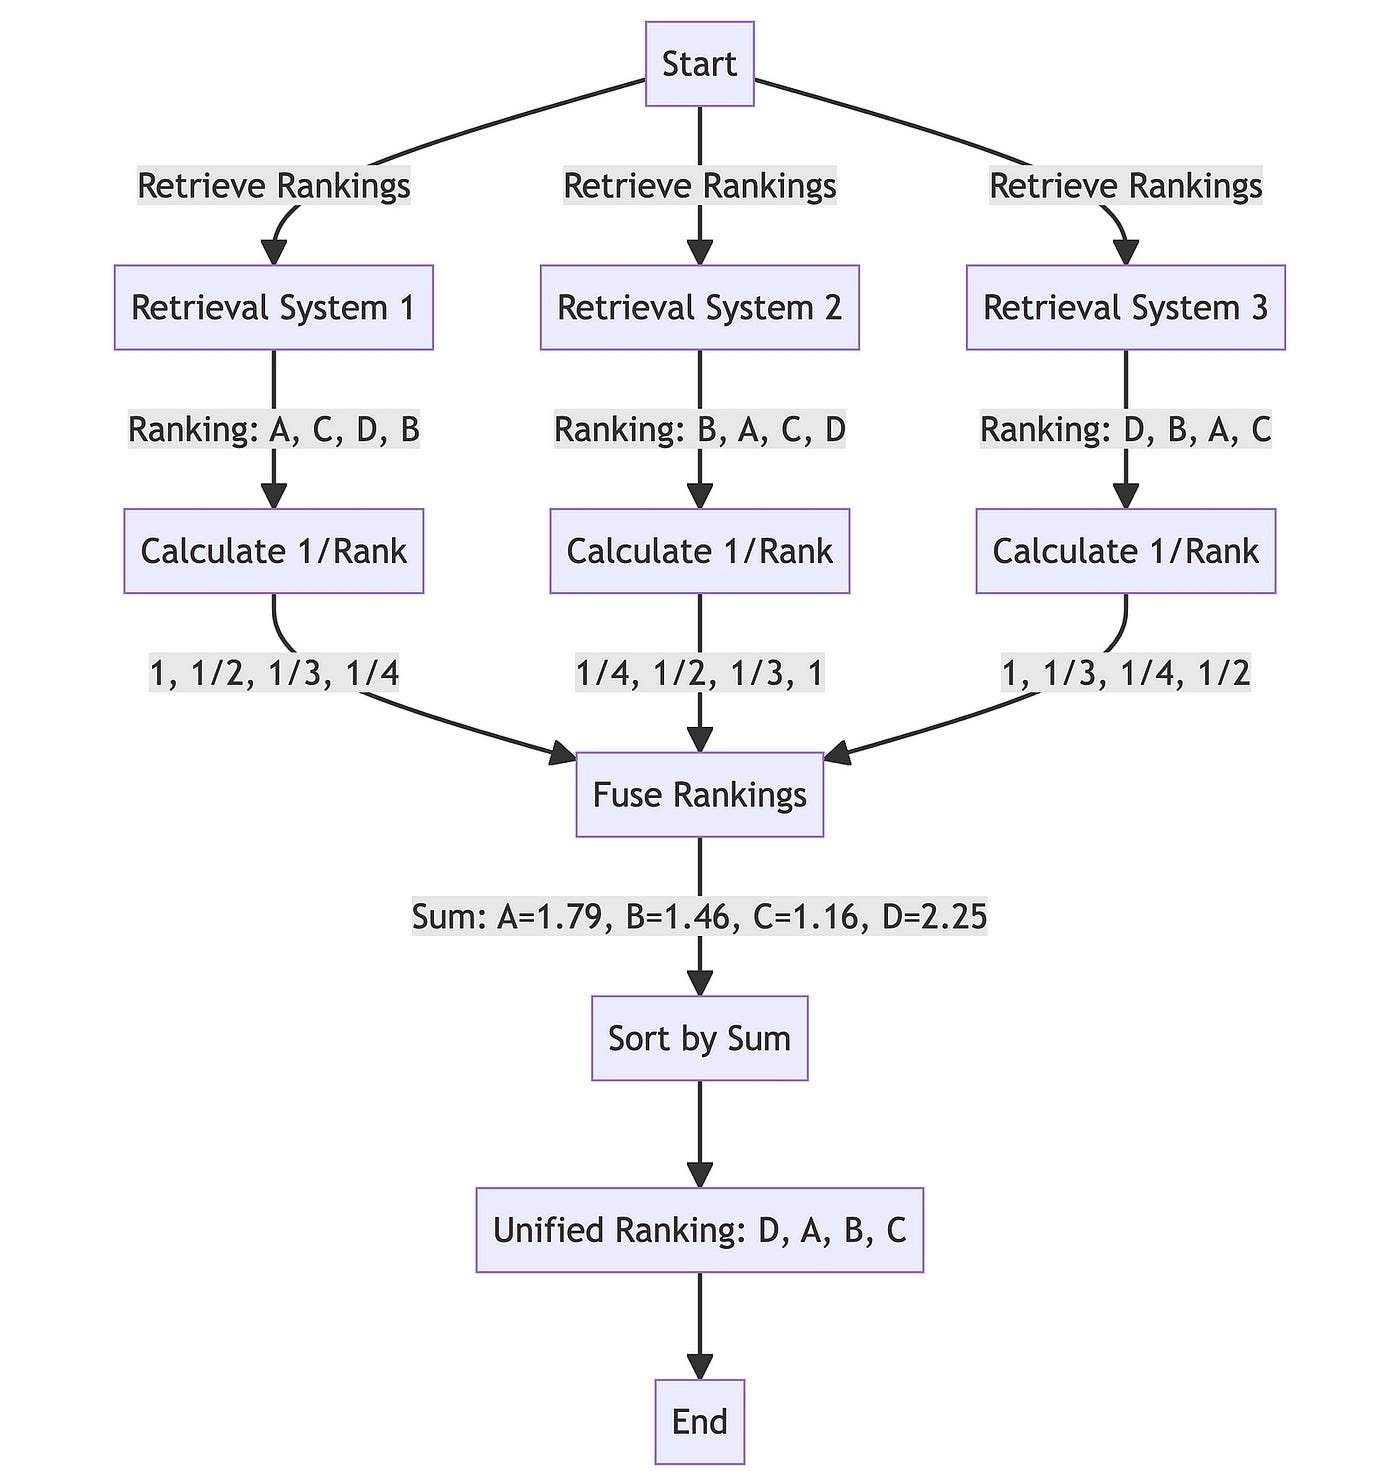

In [43]:

import textwrap
def wrap_text(text, width=90): #preserve_newlines
    # Split the input text into lines based on newline characters
    lines = text.split('\n')

    # Wrap each line individually
    wrapped_lines = [textwrap.fill(line, width=width) for line in lines]

    # Join the wrapped lines back together using newline characters
    wrapped_text = '\n'.join(wrapped_lines)

    return wrapped_text


In [ ]:

# Here's a breakdown of the wrap_text function:
# Purpose:
# The wrap_text function takes a string of text and wraps it to a specified width, preserving newline characters.
# Parameters:
# text: The input text to be wrapped.
# width=90: The maximum width of the wrapped text. Defaults to 90 characters.
# Step-by-Step Explanation:
# Split the input text into lines: lines = text.split('\n')
# Splits the input text into a list of lines based on newline characters (\n).
# Wrap each line individually: wrapped_lines = [textwrap.fill(line, width=width) for line in lines]
# Uses a list comprehension to wrap each line in the lines list using the textwrap.fill function.
# The width parameter is passed to textwrap.fill to specify the maximum width of the wrapped text.
# Join the wrapped lines back together: wrapped_text = '\n'.join(wrapped_lines)
# Joins the wrapped lines back together into a single string using newline characters (\n) as separators.

In [44]:
import os
from dotenv import load_dotenv
load_dotenv()

GOOGLE_API_KEY = os.getenv('GEMINI_API_KEY')
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [41]:

from langchain_google_genai import ChatGoogleGenerativeAI

In [45]:
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")
result = llm.invoke("Write a ballad about LangChain") # a slow sentimental or romantic song.
print(result.content)

The coder toiled, in screens' pale light,
With APIs a-scattered, a sorry sight.
Data streams flowed, a chaotic mess,
No easy way to query, no time to assess.

Then whispered winds, a novel name,
LangChain arose, to banish shame.
A framework strong, a guiding hand,
To tame the chaos, across the land.

It wove the chains, of LLMs grand,
With agents swift, at its command.
From prompt to query, a seamless flow,
Unlocking knowledge, high and low.

The coder wept, with joyful tears,
No more long nights, no haunting fears.
With chains of thought, so clear and bright,
LangChain revealed, the answers right.

It spoke to vectors, in hushed tones deep,
Where hidden meanings, secrets sleep.
It summoned tools, with graceful ease,
And built the pipelines, meant to please.

From chatbots wise, to scripts so keen,
LangChain empowered, every scene.
It broke the barriers, set minds free,
A symphony of AI, for all to see.

But whispers warn, of power's sway,
Use it with wisdom, day by day.
For chains can

In [22]:

from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores.chroma import Chroma
import langchain

In [4]:

from langchain.document_loaders import DirectoryLoader
from langchain.document_loaders import TextLoader

In [ ]:
import nltk
# nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


True

In [2]:
nltk.data.path.append('C:/Users/lenovo/AppData/Roaming/nltk_data')

In [6]:
data_path="data"

In [12]:

%%time
loader = DirectoryLoader(data_path, glob="*.txt", show_progress=True)
docs = loader.load()


libmagic is unavailable but assists in filetype detection. Please consider installing libmagic for better results.
100%|██████████| 1/1 [35:32<00:00, 2132.54s/it]

100%|██████████| 1/1 [00:02<00:00,  2.37s/it]

CPU times: total: 1.08 s
Wall time: 2.38 s


In [14]:
docs

[Document(metadata={'source': 'data\\fusion.txt'}, page_content='M r. and Mrs. Dursley, of number four, Privet Drive, were\n\nproud to say that they were perfectly normal, thank\n\nyou very much.  ey were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t\n\nhold with such nonsense.\n\nMr. Dursley was the director of a fi rm called Grunnings, which\n\nmade drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin\n\nand blonde and had nearly twice the usual amount of neck, which\n\ncame in very useful as she spent so much of her time craning over\n\ngarden fences, spying on the neighbors.  e Dursleys had a small\n\nson called Dudley and in their opinion there was no fi ner boy\n\nanywhere.\n\ne Dursleys had everything they wanted, but they also had a\n\nsecret, and their greatest fear was that somebody would discover it.\n\ney didn’t think they could bear it if anyone foun

In [13]:

len(docs)

1

In [15]:

docs[0]

Document(metadata={'source': 'data\\fusion.txt'}, page_content='M r. and Mrs. Dursley, of number four, Privet Drive, were\n\nproud to say that they were perfectly normal, thank\n\nyou very much.  ey were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t\n\nhold with such nonsense.\n\nMr. Dursley was the director of a fi rm called Grunnings, which\n\nmade drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin\n\nand blonde and had nearly twice the usual amount of neck, which\n\ncame in very useful as she spent so much of her time craning over\n\ngarden fences, spying on the neighbors.  e Dursleys had a small\n\nson called Dudley and in their opinion there was no fi ner boy\n\nanywhere.\n\ne Dursleys had everything they wanted, but they also had a\n\nsecret, and their greatest fear was that somebody would discover it.\n\ney didn’t think they could bear it if anyone found

In [18]:

print(docs[0].page_content)

M r. and Mrs. Dursley, of number four, Privet Drive, were

proud to say that they were perfectly normal, thank

you very much.  ey were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t

hold with such nonsense.

Mr. Dursley was the director of a fi rm called Grunnings, which

made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin

and blonde and had nearly twice the usual amount of neck, which

came in very useful as she spent so much of her time craning over

garden fences, spying on the neighbors.  e Dursleys had a small

son called Dudley and in their opinion there was no fi ner boy

anywhere.

e Dursleys had everything they wanted, but they also had a

secret, and their greatest fear was that somebody would discover it.

ey didn’t think they could bear it if anyone found out about the

Potters. Mrs. Potter was Mrs. Dursley’s sister, but they hadn’t met

for s

In [20]:
raw_text = ''
for i, doc in enumerate(docs):
    text = doc.page_content
    if text:
        raw_text += text

In [21]:
raw_text

'M r. and Mrs. Dursley, of number four, Privet Drive, were\n\nproud to say that they were perfectly normal, thank\n\nyou very much.  ey were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t\n\nhold with such nonsense.\n\nMr. Dursley was the director of a fi rm called Grunnings, which\n\nmade drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin\n\nand blonde and had nearly twice the usual amount of neck, which\n\ncame in very useful as she spent so much of her time craning over\n\ngarden fences, spying on the neighbors.  e Dursleys had a small\n\nson called Dudley and in their opinion there was no fi ner boy\n\nanywhere.\n\ne Dursleys had everything they wanted, but they also had a\n\nsecret, and their greatest fear was that somebody would discover it.\n\ney didn’t think they could bear it if anyone found out about the\n\nPotters. Mrs. Potter was Mrs. Dursley’s siste

In [23]:

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 500,
    chunk_overlap  = 100,
    length_function = len,
    is_separator_regex = False,
)

In [24]:
text_splitter

In [25]:

texts = text_splitter.split_text(raw_text)

In [26]:
texts

['M r. and Mrs. Dursley, of number four, Privet Drive, were\n\nproud to say that they were perfectly normal, thank\n\nyou very much.  ey were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t\n\nhold with such nonsense.\n\nMr. Dursley was the director of a fi rm called Grunnings, which\n\nmade drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin',
 'and blonde and had nearly twice the usual amount of neck, which\n\ncame in very useful as she spent so much of her time craning over\n\ngarden fences, spying on the neighbors.  e Dursleys had a small\n\nson called Dudley and in their opinion there was no fi ner boy\n\nanywhere.\n\ne Dursleys had everything they wanted, but they also had a\n\nsecret, and their greatest fear was that somebody would discover it.\n\ney didn’t think they could bear it if anyone found out about the',
 'ey didn’t think they could bear it if anyo

In [27]:

len(texts)

23

In [28]:

print(texts[4])

most boring tie for work, and Mrs. Dursley gossiped away happily

as she wrestled a screaming Dudley into his high chair.

None of them noticed a large, tawny owl fl utter past the

window.

At half past eight, Mr. Dursley picked up his briefcase, pecked

Mrs. Dursley on the cheek, and tried to kiss Dudley good-bye but

missed, because Dudley was now having a tantrum and throwing

his cereal at the walls. “Little tyke,” chortled Mr. Dursley as he left


In [29]:

from langchain.embeddings import HuggingFaceBgeEmbeddings

In [30]:

model_name = "BAAI/bge-small-en-v1.5"
encode_kwargs = {'normalize_embeddings': True} # set True to compute cosine similarity

In [31]:

embedding_function = HuggingFaceBgeEmbeddings(
    model_name=model_name,
    #model_kwargs={'device': 'cuda'},
    encode_kwargs=encode_kwargs,
)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_18184\1025109082.py:1: LangChainDeprecationWarning: The class `HuggingFaceBgeEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_function = HuggingFaceBgeEmbeddings(
d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C

In [32]:
%%time
### Make the chroma and persiste to disk
db = Chroma.from_texts(texts,embedding_function,persist_directory="./chroma_db")

CPU times: total: 8.72 s
Wall time: 11 s


In [33]:

query = "Tell me about Mr. Dursley ?"

db.similarity_search(query, k=5)

[Document(metadata={}, page_content='gave himself a little shake and put the cat out of his mind. As he\n\ndrove toward town he thought of nothing except a large order of\n\ndrills he was hoping to get that day.\n\nBut on the edge of town, drills were driven out of his mind\n\nby something else. As he sat in the usual morning traffi c jam, he\n\ncouldn’t help noticing that there seemed to be a lot of strangely\n\ndressed people about. People in cloaks. Mr. Dursley couldn’t bear\n\npeople who dressed in funny clothes — the getups you saw on'),
 Document(metadata={}, page_content='M r. and Mrs. Dursley, of number four, Privet Drive, were\n\nproud to say that they were perfectly normal, thank\n\nyou very much.  ey were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t\n\nhold with such nonsense.\n\nMr. Dursley was the director of a fi rm called Grunnings, which\n\nmade drills. He was a big, beefy man with hardly any neck, although he d

In [34]:

retriever = db.as_retriever() # can add mmr fetch_k=20, search_type="mmr"

retriever.get_relevant_documents(query)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_18184\512223110.py:3: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  retriever.get_relevant_documents(query)


[Document(metadata={}, page_content='gave himself a little shake and put the cat out of his mind. As he\n\ndrove toward town he thought of nothing except a large order of\n\ndrills he was hoping to get that day.\n\nBut on the edge of town, drills were driven out of his mind\n\nby something else. As he sat in the usual morning traffi c jam, he\n\ncouldn’t help noticing that there seemed to be a lot of strangely\n\ndressed people about. People in cloaks. Mr. Dursley couldn’t bear\n\npeople who dressed in funny clothes — the getups you saw on'),
 Document(metadata={}, page_content='M r. and Mrs. Dursley, of number four, Privet Drive, were\n\nproud to say that they were perfectly normal, thank\n\nyou very much.  ey were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t\n\nhold with such nonsense.\n\nMr. Dursley was the director of a fi rm called Grunnings, which\n\nmade drills. He was a big, beefy man with hardly any neck, although he d

In [35]:

from operator import itemgetter
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser
from langchain.schema.runnable import RunnableLambda, RunnablePassthrough

In [36]:
template = """Answer the question based only on the following context:
{context}

Question: {question}
"""

In [37]:


prompt = ChatPromptTemplate.from_template(template)

In [38]:
prompt

ChatPromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template='Answer the question based only on the following context:\n{context}\n\nQuestion: {question}\n'), additional_kwargs={})])

In [46]:
llm

ChatGoogleGenerativeAI(model='models/gemini-1.5-pro', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x000001FEF03E4A10>, default_metadata=())

In [47]:

chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

In [48]:
chain

{
  context: VectorStoreRetriever(tags=['Chroma', 'HuggingFaceBgeEmbeddings'], vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x000001FEE735A910>, search_kwargs={}),
  question: RunnablePassthrough()
}
| ChatPromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template='Answer the question based only on the following context:\n{context}\n\nQuestion: {question}\n'), additional_kwargs={})])
| ChatGoogleGenerativeAI(model='models/gemini-1.5-pro', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x000001FEF03E4A10>, default_metadata=())
| StrOutputParser()

In [49]:

text_reply = chain.invoke("Tell me about  Mr. Dursley ")


In [50]:
text_reply

'Mr. Dursley is the director of Grunnings, a firm that makes drills. He is described as a big, beefy man with hardly any neck, but a very large mustache. He is preoccupied with a large order of drills, but becomes distracted by people in cloaks. He dislikes people who dress in unusual clothing. He works in an office on the ninth floor, where he sits with his back to the window. He is married to Mrs. Dursley and they live at number four, Privet Drive. They consider themselves perfectly normal and disapprove of anything strange or mysterious.'

In [51]:
print(wrap_text(text_reply))

Mr. Dursley is the director of Grunnings, a firm that makes drills. He is described as a
big, beefy man with hardly any neck, but a very large mustache. He is preoccupied with a
large order of drills, but becomes distracted by people in cloaks. He dislikes people who
dress in unusual clothing. He works in an office on the ninth floor, where he sits with
his back to the window. He is married to Mrs. Dursley and they live at number four, Privet
Drive. They consider themselves perfectly normal and disapprove of anything strange or
mysterious.


RagFusion

In [52]:

from langchain.schema.output_parser import StrOutputParser
from langchain.prompts import SystemMessagePromptTemplate, HumanMessagePromptTemplate
from langchain.prompts import ChatMessagePromptTemplate, PromptTemplate

In [54]:
messages=[
        SystemMessagePromptTemplate(
            prompt=PromptTemplate(
                input_variables=[],
                template='You are a helpful assistant that generates multiple search queries based on a single input query.'
                )
            ),
        HumanMessagePromptTemplate(
            prompt=PromptTemplate(
                input_variables=['original_query'], # question
                template='Generate multiple search queries related to: {question} \n OUTPUT (4 queries):'
                )
            )
        ]

In [55]:
messages

[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a helpful assistant that generates multiple search queries based on a single input query.'), additional_kwargs={}),
 HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='Generate multiple search queries related to: {question} \n OUTPUT (4 queries):'), additional_kwargs={})]

In [56]:
prompt = ChatPromptTemplate(
    input_variables=['original_query'],
    messages= messages
    
    )

In [57]:
prompt

ChatPromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a helpful assistant that generates multiple search queries based on a single input query.'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='Generate multiple search queries related to: {question} \n OUTPUT (4 queries):'), additional_kwargs={})])

In [58]:
original_query = "Mr. Dursley" # question 

In [59]:
generate_queries = (
    prompt | llm | StrOutputParser() | (lambda x: x.split("\n"))
)

In [60]:
generate_queries

ChatPromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a helpful assistant that generates multiple search queries based on a single input query.'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='Generate multiple search queries related to: {question} \n OUTPUT (4 queries):'), additional_kwargs={})])
| ChatGoogleGenerativeAI(model='models/gemini-1.5-pro', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x000001FEF03E4A10>, default_metadata=())
| StrOutputParser()
| RunnableLambda(lambda x: x.split('\n'))

create multi queries

In [62]:
queries = generate_queries.invoke(original_query) # generate 4 queries

In [89]:
queries

['1. "Mr. Dursley" Harry Potter character analysis',
 '2. Vernon Dursley personality traits',
 "3. Mr. Dursley's relationship with Harry Potter",
 '4.  How does Mr. Dursley represent the mundane in Harry Potter?']

In [93]:
results = [retriever.get_relevant_documents(query) for query in queries]

results of multi queries with rank

In [94]:
results

[[Document(metadata={}, page_content='street.  e Dursleys knew that the Potters had a small son, too, but\n\nthey had never even seen him.  is boy was another good reason\n\nfor keeping the Potters away; they didn’t want Dudley mixing with\n\na child like that.\n\nWhen Mr. and Mrs. Dursley woke up on the dull, gray Tuesday\n\nour story starts, there was nothing about the cloudy sky outside to\n\nsuggest that strange and mysterious things would soon be happening all over the country. Mr. Dursley hummed as he picked out his'),
  Document(metadata={}, page_content='bunch were whispering excitedly, too, and he couldn’t see a single\n\ncollecting tin. It was on his way back past them, clutching a large\n\ndoughnut in a bag, that he caught a few words of what they were\n\nsaying.\n\n“ e Potters, that’s right, that’s what I heard —”\n\n“— yes, their son, Harry —”\n\nMr. Dursley stopped dead. Fear fl ooded him. He looked back\n\nat the whisperers as if he wanted to say something to them, but\n

In [64]:
from langchain.load import dumps, loads

In [65]:
k=60

reciprocal rankings

In [95]:
fused_scores = {}
for docs in results:
    # Assumes the docs are returned in sorted order of relevance
    for rank, doc in enumerate(docs):
        doc_str = dumps(doc)
        print(rank)
        print(doc_str)

        if doc_str not in fused_scores:
            fused_scores[doc_str] = 0
        previous_score = fused_scores[doc_str]
        print("previous_score: ", previous_score)
        fused_scores[doc_str] += 1 / (rank + k)

0
{"lc": 1, "type": "constructor", "id": ["langchain", "schema", "document", "Document"], "kwargs": {"page_content": "street.  e Dursleys knew that the Potters had a small son, too, but\n\nthey had never even seen him.  is boy was another good reason\n\nfor keeping the Potters away; they didn\u2019t want Dudley mixing with\n\na child like that.\n\nWhen Mr. and Mrs. Dursley woke up on the dull, gray Tuesday\n\nour story starts, there was nothing about the cloudy sky outside to\n\nsuggest that strange and mysterious things would soon be happening all over the country. Mr. Dursley hummed as he picked out his", "type": "Document"}}
previous_score:  0
1
{"lc": 1, "type": "constructor", "id": ["langchain", "schema", "document", "Document"], "kwargs": {"page_content": "bunch were whispering excitedly, too, and he couldn\u2019t see a single\n\ncollecting tin. It was on his way back past them, clutching a large\n\ndoughnut in a bag, that he caught a few words of what they were\n\nsaying.\n\n\u2

In [96]:
fused_scores

{'{"lc": 1, "type": "constructor", "id": ["langchain", "schema", "document", "Document"], "kwargs": {"page_content": "street.  e Dursleys knew that the Potters had a small son, too, but\\n\\nthey had never even seen him.  is boy was another good reason\\n\\nfor keeping the Potters away; they didn\\u2019t want Dudley mixing with\\n\\na child like that.\\n\\nWhen Mr. and Mrs. Dursley woke up on the dull, gray Tuesday\\n\\nour story starts, there was nothing about the cloudy sky outside to\\n\\nsuggest that strange and mysterious things would soon be happening all over the country. Mr. Dursley hummed as he picked out his", "type": "Document"}}': 0.05,
 '{"lc": 1, "type": "constructor", "id": ["langchain", "schema", "document", "Document"], "kwargs": {"page_content": "bunch were whispering excitedly, too, and he couldn\\u2019t see a single\\n\\ncollecting tin. It was on his way back past them, clutching a large\\n\\ndoughnut in a bag, that he caught a few words of what they were\\n\\nsayin

In [97]:
reranked_results = [
        (loads(doc), score) for doc, score in sorted(fused_scores.items(), key=lambda x: x[1], reverse=True) # sorting key 2nd element
    ]

In [ ]:
# fused_scores.items(): Returns a list-like object of dictionary's key-value tuple pairs.
# sorted(...): Sorts the list of tuple pairs based on the specified key function.
# key=lambda x: x[1]: Specifies that the sorting should be based on the score (the second element of each tuple pair).
# reverse=True: Sorts the list in descending order (highest score first).
# (loads(doc), score): For each sorted tuple pair, loads the document using the loads function and returns a tuple containing the loaded document and its score.

In [98]:
reranked_results

[(Document(metadata={}, page_content='street.  e Dursleys knew that the Potters had a small son, too, but\n\nthey had never even seen him.  is boy was another good reason\n\nfor keeping the Potters away; they didn’t want Dudley mixing with\n\na child like that.\n\nWhen Mr. and Mrs. Dursley woke up on the dull, gray Tuesday\n\nour story starts, there was nothing about the cloudy sky outside to\n\nsuggest that strange and mysterious things would soon be happening all over the country. Mr. Dursley hummed as he picked out his'),
  0.05),
 (Document(metadata={}, page_content='bunch were whispering excitedly, too, and he couldn’t see a single\n\ncollecting tin. It was on his way back past them, clutching a large\n\ndoughnut in a bag, that he caught a few words of what they were\n\nsaying.\n\n“ e Potters, that’s right, that’s what I heard —”\n\n“— yes, their son, Harry —”\n\nMr. Dursley stopped dead. Fear fl ooded him. He looked back\n\nat the whisperers as if he wanted to say something to th

In [81]:



def reciprocal_rank_fusion(results: list[list], k=60):
    fused_scores = {}
    for docs in results:
        # Assumes the docs are returned in sorted order of relevance
        for rank, doc in enumerate(docs):
            doc_str = dumps(doc)
            if doc_str not in fused_scores:
                fused_scores[doc_str] = 0
            previous_score = fused_scores[doc_str]
            fused_scores[doc_str] += 1 / (rank + k)

    reranked_results = [
        (loads(doc), score)
        for doc, score in sorted(fused_scores.items(), key=lambda x: x[1], reverse=True)
    ]
    return reranked_results

In [82]:

ragfusion_chain = generate_queries | retriever.map() | reciprocal_rank_fusion

In [83]:
ragfusion_chain

ChatPromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a helpful assistant that generates multiple search queries based on a single input query.'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='Generate multiple search queries related to: {question} \n OUTPUT (4 queries):'), additional_kwargs={})])
| ChatGoogleGenerativeAI(model='models/gemini-1.5-pro', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x000001FEF03E4A10>, default_metadata=())
| StrOutputParser()
| RunnableLambda(lambda x: x.split('\n'))
| RunnableEach(bound=VectorStoreRetriever(tags=['Chroma', 'HuggingFaceBgeEmbeddings'], vectorstore=<langchain_commu

In [84]:

langchain.debug = True
  

In [ ]:
# To verify that debug mode is enabled, you can check the LangChain logs or console output for debug-level messages.

In [85]:

ragfusion_chain.input_schema.schema()

{'properties': {'question': {'title': 'Question', 'type': 'string'}},
 'required': ['question'],
 'title': 'PromptInput',
 'type': 'object'}

In [86]:
ragfusion_chain.invoke({"question": original_query})

[chain/start] [chain:RunnableSequence] Entering Chain run with input:
{
  "question": "Mr. Dursley"
}
[chain/start] [chain:RunnableSequence > prompt:ChatPromptTemplate] Entering Prompt run with input:
{
  "question": "Mr. Dursley"
}
[chain/end] [chain:RunnableSequence > prompt:ChatPromptTemplate] s] Exiting Prompt run with output:
[outputs]
[llm/start] [chain:RunnableSequence > llm:ChatGoogleGenerativeAI] Entering LLM run with input:
{
  "prompts": [
    "System: You are a helpful assistant that generates multiple search queries based on a single input query.\nHuman: Generate multiple search queries related to: Mr. Dursley \n OUTPUT (4 queries):"
  ]
}
[llm/end] [chain:RunnableSequence > llm:ChatGoogleGenerativeAI] [3.57s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "1. \"Mr. Dursley character analysis Harry Potter\"\n2. \"Vernon Dursley actor\"\n3. \"Mr. Dursley's role in Harry Potter\"\n4. \"Mr. and Mrs. Dursley relationship\" ",
        "generatio

[(Document(metadata={}, page_content='street.  e Dursleys knew that the Potters had a small son, too, but\n\nthey had never even seen him.  is boy was another good reason\n\nfor keeping the Potters away; they didn’t want Dudley mixing with\n\na child like that.\n\nWhen Mr. and Mrs. Dursley woke up on the dull, gray Tuesday\n\nour story starts, there was nothing about the cloudy sky outside to\n\nsuggest that strange and mysterious things would soon be happening all over the country. Mr. Dursley hummed as he picked out his'),
  0.04972677595628415),
 (Document(metadata={}, page_content='had a son called Harry. Come to think of it, he wasn’t even sure his\n\nnephew was called Harry. He’d never even seen the boy. It might\n\nhave been Harvey. Or Harold.  ere was no point in worrying\n\nMrs. Dursley; she always got so upset at any mention of her sister.\n\nHe didn’t blame her — if he’d had a sister like that . . . but all the\n\nsame, those people in cloaks . . .\n\nHe found it a lot harde

In [99]:

from langchain.schema.runnable import RunnablePassthrough
template = """Answer the question based only on the following context:
{context}

Question: {question}
"""

In [100]:
prompt = ChatPromptTemplate.from_template(template)

In [101]:
full_rag_fusion_chain = (
    {
        "context": ragfusion_chain,
        "question": RunnablePassthrough()
    }
    | prompt
    | llm
    | StrOutputParser()
)

In [102]:
full_rag_fusion_chain.input_schema.schema()

{'properties': {'question': {'title': 'Question', 'type': 'string'},
  'root': {'title': 'Root'}},
 'required': ['question', 'root'],
 'title': 'RunnableParallel<context,question>Input',
 'type': 'object'}

In [103]:

full_rag_fusion_chain.invoke({"question": "Tell me about Mr. Dursley ?"})

[chain/start] [chain:RunnableSequence] Entering Chain run with input:
{
  "question": "Tell me about Mr. Dursley ?"
}
[chain/start] [chain:RunnableSequence > chain:RunnableParallel<context,question>] Entering Chain run with input:
{
  "question": "Tell me about Mr. Dursley ?"
}
[chain/start] [chain:RunnableSequence > chain:RunnableParallel<context,question> > chain:RunnableSequence] Entering Chain run with input:
{
  "question": "Tell me about Mr. Dursley ?"
}
[chain/start] [chain:RunnableSequence > chain:RunnableParallel<context,question> > chain:RunnableSequence > prompt:ChatPromptTemplate] Entering Prompt run with input:
{
  "question": "Tell me about Mr. Dursley ?"
}
[chain/end] [chain:RunnableSequence > chain:RunnableParallel<context,question> > chain:RunnableSequence > prompt:ChatPromptTemplate] s] Exiting Prompt run with output:
[outputs]
[llm/start] [chain:RunnableSequence > chain:RunnableParallel<context,question> > chain:RunnableSequence > llm:ChatGoogleGenerativeAI] Entering

'Mr. Dursley is the director of Grunnings, a firm that makes drills. He is described as a big, beefy man with hardly any neck, but a very large mustache. He and his wife, Mrs. Dursley, consider themselves perfectly normal and dislike anything strange or mysterious. They have a small son, Dudley, and also a secret they desperately want to keep hidden.  Mr. Dursley is disturbed by strangely dressed people he sees on his way to work and is later hugged by an old man celebrating the demise of "You-Know-Who." He is also concerned about the Potters, his wife\'s sister and her husband, and their son, whose name he can\'t even recall.'